In [1]:
import pandas as pd
zong = pd.read_excel('总.xlsx')
TainYuan = pd.read_excel('田园菜单.xlsx')
BaiYe = pd.read_excel('百业菜单.xlsx')
LongShan = pd.read_excel('龙山菜单.xlsx')

In [3]:
print(zong.info())
print(TainYuan.info())
print(BaiYe.info())
print(LongShan.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   序号      0 non-null      float64
 1   餐厅名称    16 non-null     object 
 2   周人流量    16 non-null     int64  
 3   周营业额    16 non-null     int64  
 4   投诉情况    16 non-null     int64  
 5   环境打分    16 non-null     float64
 6   饮食习惯    16 non-null     float64
 7   食物安全    16 non-null     float64
 8   营养均衡    16 non-null     float64
dtypes: float64(5), int64(3), object(1)
memory usage: 1.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   田园食堂菜品   23 non-null     object 
 1   评分       23 non-null     float64
 2   菜品周销量排行  23 non-null     int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 680.0+ bytes
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries

<Figure size 640x480 with 0 Axes>

<Figure size 900x350 with 0 Axes>

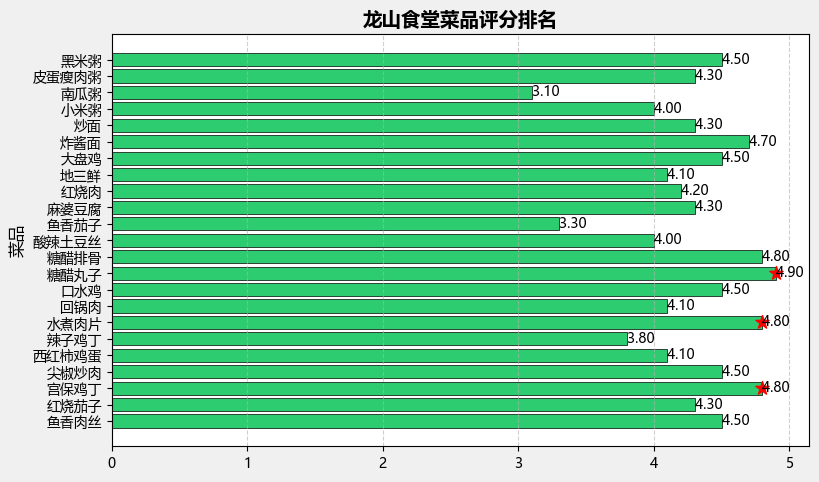

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import tkinter as tk

# Set the background color
bg_color = (240, 240, 240)
bg_color_hex = "#{:02x}{:02x}{:02x}".format(*bg_color)

plt.rcParams['font.sans-serif'] = 'Microsoft YaHei'
plt.rcParams['axes.unicode_minus'] = False

# Load data
zong = pd.read_excel('总.xlsx')
TainYuan = pd.read_excel('田园菜单.xlsx')
BaiYe = pd.read_excel('百业菜单.xlsx')
LongShan = pd.read_excel('龙山菜单.xlsx')

# Calculate average expenditure per person
zong['人均消费'] = zong['周营业额'] / zong['周人流量']

# Create Tkinter window
window = tk.Tk()
window.title("食堂数据分析")

def display_ranking(df, title):
    plt.clf()  # Clear the previous plot
    plt.figure(figsize=(9, 3.5), facecolor=bg_color_hex)  # Adjust the size and background color as needed
    
    # Plot all cafeterias
    plt.barh(df['餐厅名称'], df['人均消费'], color='#3498db', edgecolor='black', linewidth=0.5)
    
    # Annotate the data points
    for index, value in enumerate(df['人均消费']):
        plt.text(value, index, f'{value:.2f} 元', ha='left', va='center', fontsize=10)
    
    plt.title(title + '人均消费排名', fontsize=14, fontweight='bold')
    # plt.xlabel('人均消费', fontsize=12)
    plt.ylabel('餐厅名称', fontsize=12)
    
    # Display the chart in the Tkinter window
    canvas = FigureCanvasTkAgg(plt.gcf(), master=window)
    canvas.draw()
    if hasattr(display_ranking, 'tk_canvas'):
        display_ranking.tk_canvas.get_tk_widget().destroy()
    canvas.get_tk_widget().pack()
    display_ranking.tk_canvas = canvas

# Function to display menu ranking for a specific cafeteria
def display_menu_ranking(df, title):
    top3 = df.nlargest(3, '评分')  # Change to the desired criteria for menu item ranking
    plt.clf()  # Clear the previous plot
    plt.figure(figsize=(9, 6), facecolor=bg_color_hex)  # Adjust the size and background color as needed
    plt.barh(df[title+'菜品'], df['评分'], color='#2ecc71', edgecolor='black', linewidth=0.5)
    plt.scatter(top3['评分'], top3[title+'菜品'], color='red', marker='*', s=100, label='Top 3')  # Highlight top 3 with red stars
        # Annotate the data points
    for index, value in enumerate(df['评分']):
        plt.text(value, index, f'{value:.2f} ', ha='left', va='center', fontsize=10)
    
    plt.title(title + '菜品评分排名', fontsize=14, fontweight='bold')
    # plt.xlabel('评分', fontsize=12)
    plt.ylabel('菜品', fontsize=12)
    # plt.legend()
    plt.grid(axis='x', linestyle='--', alpha=0.6)

    # Display the chart in the Tkinter window
    canvas = FigureCanvasTkAgg(plt.gcf(), master=window)
    canvas.draw()
    if hasattr(display_menu_ranking, 'tk_canvas'):
        display_menu_ranking.tk_canvas.get_tk_widget().destroy()
    canvas.get_tk_widget().pack()
    display_menu_ranking.tk_canvas = canvas

# Function to handle button clicks
def button_click(cafeteria):
    if cafeteria == '田园菜单':
        display_menu_ranking(TainYuan, '田园食堂')
    elif cafeteria == '百业菜单':
        display_menu_ranking(BaiYe, '百业广场')
    elif cafeteria == '龙山菜单':
        display_menu_ranking(LongShan, '龙山食堂')

# Button for each cafeteria
btn_tianyuan = tk.Button(window, text="田园菜单", command=lambda: button_click('田园菜单'), bg='#3498db', fg='white', font=('Arial', 12))
btn_tianyuan.pack(side=tk.TOP, padx=5)

btn_baiye = tk.Button(window, text="百业菜单", command=lambda: button_click('百业菜单'), bg='#3498db', fg='white', font=('Arial', 12))
btn_baiye.pack(side=tk.TOP, padx=5)

btn_longshan = tk.Button(window, text="龙山菜单", command=lambda: button_click('龙山菜单'), bg='#3498db', fg='white', font=('Arial', 12))
btn_longshan.pack(side=tk.TOP, padx=5)

# # Display average expenditure per person for all cafeterias
# label_avg_exp_all = tk.Label(window, text=f"\n全部人均消费：{zong['人均消费'].mean():.2f} 元", font=('Arial', 14))
# label_avg_exp_all.pack()

# Display cafeteria ranking
display_ranking(zong, '食堂')

# Run the Tkinter event loop
window.mainloop()


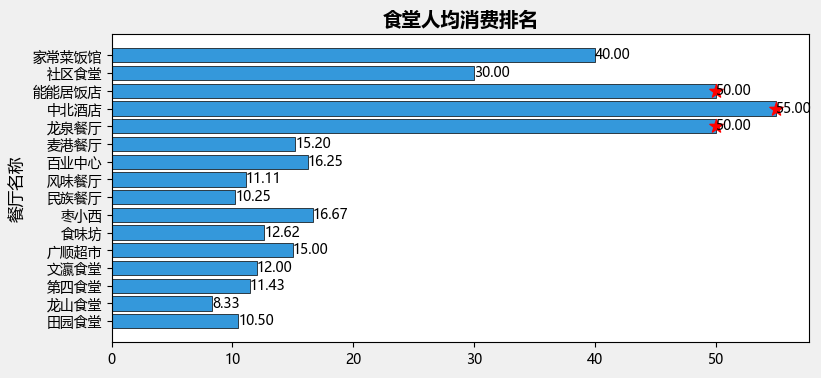

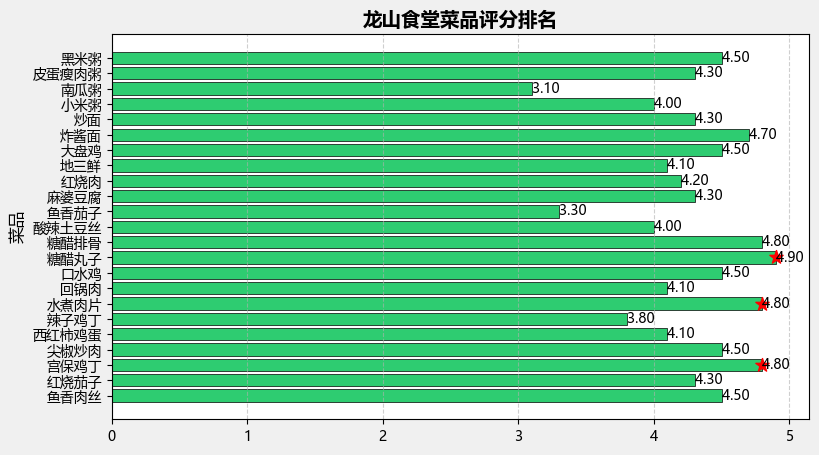

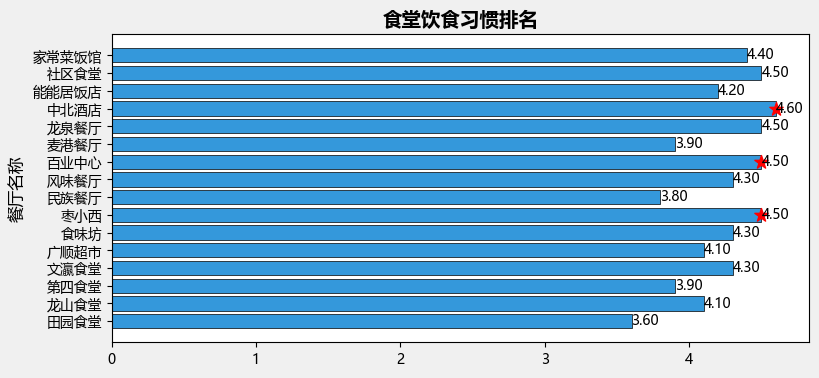

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import tkinter as tk

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import tkinter as tk

# Set the background color
bg_color = (240, 240, 240)
bg_color_hex = "#{:02x}{:02x}{:02x}".format(*bg_color)

plt.rcParams['font.sans-serif'] = 'Microsoft YaHei'
plt.rcParams['axes.unicode_minus'] = False

# Load data
zong = pd.read_excel('总.xlsx')
TainYuan = pd.read_excel('田园菜单.xlsx')
BaiYe = pd.read_excel('百业菜单.xlsx')
LongShan = pd.read_excel('龙山菜单.xlsx')

# Calculate average expenditure per person
zong['人均消费'] = zong['周营业额'] / zong['周人流量']

# Create Tkinter window
window = tk.Tk()
window.title("食堂数据分析")

def display_ranking(df, title):
    plt.clf()  # Clear the previous plot
    plt.figure(figsize=(9, 3.5), facecolor=bg_color_hex)  # Adjust the size and background color as needed
    
    # Plot all cafeterias
    plt.barh(df['餐厅名称'], df['人均消费'], color='#3498db', edgecolor='black', linewidth=0.5)
    
    # Annotate the data points
    for index, value in enumerate(df['人均消费']):
        plt.text(value, index, f'{value:.2f} 元', ha='left', va='center', fontsize=10)
    
    plt.title(title + '人均消费排名', fontsize=14, fontweight='bold')
    # plt.xlabel('人均消费', fontsize=12)
    plt.ylabel('餐厅名称', fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.6)

    # Display the chart in the Tkinter window
    canvas = FigureCanvasTkAgg(plt.gcf(), master=window)
    canvas.draw()
    if hasattr(display_ranking, 'tk_canvas'):
        display_ranking.tk_canvas.get_tk_widget().destroy()
    canvas.get_tk_widget().pack()
    display_ranking.tk_canvas = canvas

# Function to display menu ranking for a specific cafeteria
def display_menu_ranking(df, title):
    top3 = df.nlargest(3, '评分')  # Change to the desired criteria for menu item ranking
    # plt.clf()  # Clear the previous plot
    plt.figure(figsize=(9, 5), facecolor=bg_color_hex)  # Adjust the size and background color as needed
    plt.barh(df[title+'菜品'], df['评分'], color='#2ecc71', edgecolor='black', linewidth=0.5)
    plt.scatter(top3['评分'], top3[title+'菜品'], color='red', marker='*', s=100, label='Top 3')  # Highlight top 3 with red stars
    # Annotate the data points
    for index, value in enumerate(df['评分']):
        plt.text(value, index, f'{value:.2f} ', ha='left', va='center', fontsize=10)
    
    plt.title(title + '菜品评分排名', fontsize=14, fontweight='bold')

    plt.ylabel('菜品', fontsize=12)
    # plt.legend()
    plt.grid(axis='x', linestyle='--', alpha=0.6)

    # Display the chart in the Tkinter window
    canvas = FigureCanvasTkAgg(plt.gcf(), master=window)
    canvas.draw()
    if hasattr(display_menu_ranking, 'tk_canvas'):
        display_menu_ranking.tk_canvas.get_tk_widget().destroy()
    canvas.get_tk_widget().pack()
    display_menu_ranking.tk_canvas = canvas

# Function to handle button clicks
def button_click(cafeteria):
    if cafeteria == '田园菜单':
        display_menu_ranking(TainYuan, '田园食堂')
    elif cafeteria == '百业菜单':
        display_menu_ranking(BaiYe, '百业广场')
    elif cafeteria == '龙山菜单':
        display_menu_ranking(LongShan, '龙山食堂')

# Button for each cafeteria
# btn_tianyuan = tk.Button(window, text="田园菜单", command=lambda: button_click('田园菜单'), bg='#3498db', fg='white', font=('Arial', 12))
# btn_tianyuan.pack(side=tk.TOP, padx=5)

# btn_baiye = tk.Button(window, text="百业菜单", command=lambda: button_click('百业菜单'), bg='#3498db', fg='white', font=('Arial', 12))
# btn_baiye.pack(side=tk.TOP, padx=5)

# btn_longshan = tk.Button(window, text="龙山菜单", command=lambda: button_click('龙山菜单'), bg='#3498db', fg='white', font=('Arial', 12))
# btn_longshan.pack(side=tk.TOP, padx=5)


# Function to display rankings for specified criteria
def display_ranking_criteria(df, column, title):
    top3 = df.nlargest(3, column)
    # plt.clf()  # Clear the previous plot
    plt.figure(figsize=(9, 4), facecolor=bg_color_hex)  # Adjust the size and background color as needed
    
    # Plot all cafeterias
    plt.barh(df['餐厅名称'], df[column], color='#3498db', edgecolor='black', linewidth=0.5)
    plt.scatter(top3[column], top3['餐厅名称'], color='red', marker='*', s=100, label='Top 3')  # Highlight top 3 with red stars

    # Annotate the data points with stars for the top 3
    for index, value in enumerate(df[column]):
        annotation = f'{value:.2f}'
        # if df.iloc[index]['餐厅名称'] in top3['餐厅名称'].values:
        #     annotation += ' *'  # Add a star for the top 3
        plt.text(value, index, annotation, ha='left', va='center', fontsize=10)
    
    plt.title(title + f'{column}排名', fontsize=14, fontweight='bold')
    plt.ylabel('餐厅名称', fontsize=12)
    # plt.grid(axis='x', linestyle='--', alpha=0.6)

    # Display the chart in the Tkinter window
    canvas = FigureCanvasTkAgg(plt.gcf(), master=window)
    canvas.draw()
    if hasattr(display_ranking_criteria, 'tk_canvas'):
        display_ranking_criteria.tk_canvas.get_tk_widget().destroy()
    canvas.get_tk_widget().pack()
    display_ranking_criteria.tk_canvas = canvas


# Function to handle menu item selection for criteria ranking
def menu_select_criteria(column):
    display_ranking_criteria(zong, column, '食堂')

# Create menu bar
menu_bar = tk.Menu(window)

# Create a menu for ranking criteria
ranking_menu = tk.Menu(menu_bar, tearoff=0)

# Add ranking criteria options to the menu
ranking_menu.add_command(label="周人流量排名", command=lambda: menu_select_criteria('周人流量'))
ranking_menu.add_command(label="周营业额排名", command=lambda: menu_select_criteria('周营业额'))
ranking_menu.add_command(label="投诉情况排名", command=lambda: menu_select_criteria('投诉情况'))
ranking_menu.add_command(label="环境打分排名", command=lambda: menu_select_criteria('环境打分'))
ranking_menu.add_command(label="饮食习惯排名", command=lambda: menu_select_criteria('饮食习惯'))
ranking_menu.add_command(label="食物安全排名", command=lambda: menu_select_criteria('食物安全'))
ranking_menu.add_command(label="营养均衡排名", command=lambda: menu_select_criteria('营养均衡'))

# Add the ranking criteria menu to the menu bar

menu_bar.add_cascade(label="排名", menu=ranking_menu)
# Create menu for cafeteria options
cafeteria_menu = tk.Menu(menu_bar, tearoff=0)

# Add cafeteria options to the menu
cafeteria_menu.add_command(label="田园菜单", command=lambda: button_click('田园菜单'))
cafeteria_menu.add_command(label="百业菜单", command=lambda: button_click('百业菜单'))
cafeteria_menu.add_command(label="龙山菜单", command=lambda: button_click('龙山菜单'))

# Add the cafeteria menu to the menu bar
menu_bar.add_cascade(label="食堂菜单", menu=cafeteria_menu)

# Set the menu bar for the window
window.config(menu=menu_bar)

# Display initial average expenditure per person ranking
display_ranking_criteria(zong, '人均消费', '食堂')

# Run the Tkinter event loop
window.mainloop()


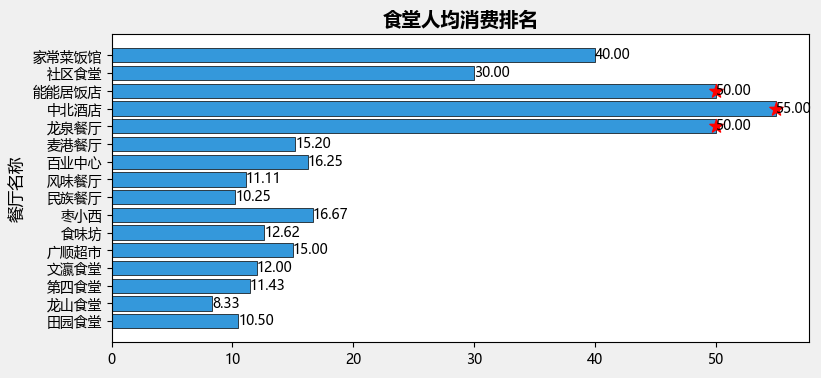

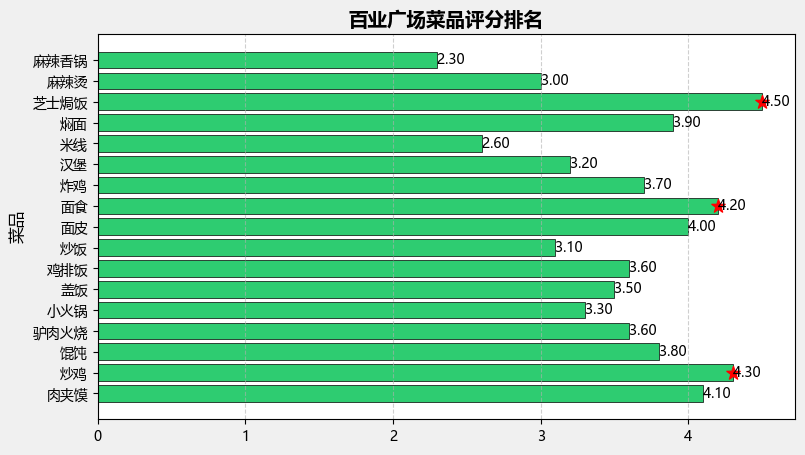

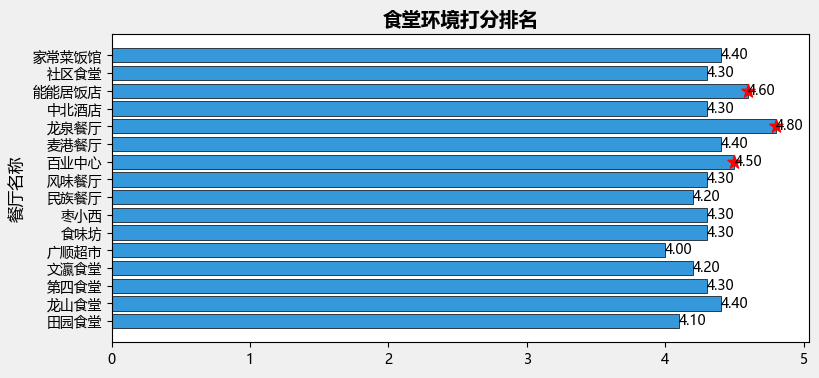

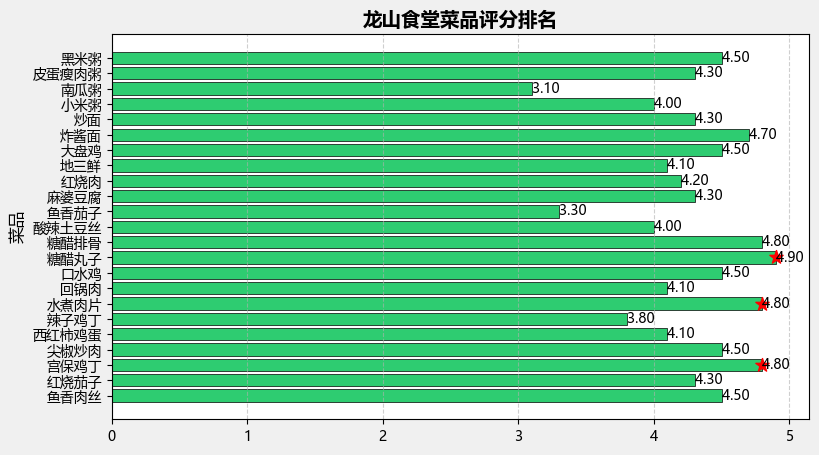

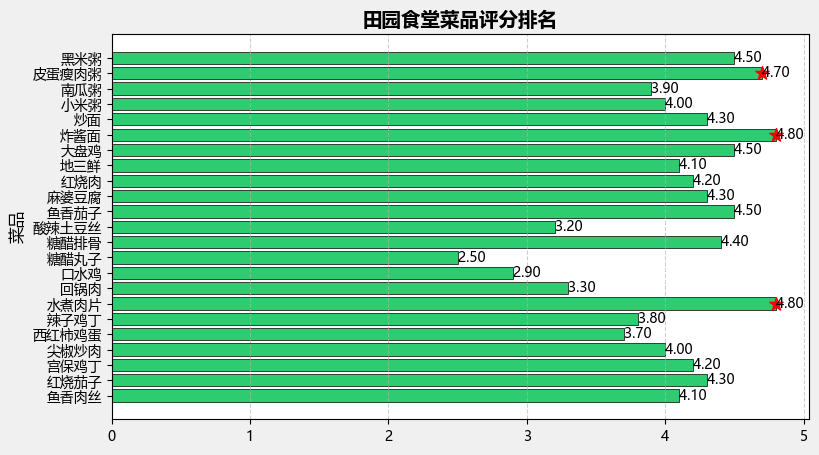

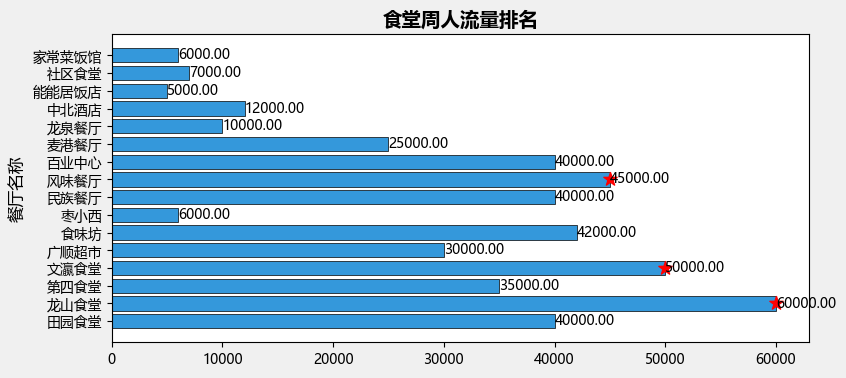

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import tkinter as tk

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import tkinter as tk

# Set the background color
bg_color = (240, 240, 240)
# Convert the background color to hexadecimal format
bg_color_hex = "#{:02x}{:02x}{:02x}".format(*bg_color)

# Set font configuration for plots
plt.rcParams['font.sans-serif'] = 'Microsoft YaHei'
# Ensure correct display of minus signs in plots
plt.rcParams['axes.unicode_minus'] = False

# Load data for each cafeteria
zong = pd.read_excel('总.xlsx')
TainYuan = pd.read_excel('田园菜单.xlsx')
BaiYe = pd.read_excel('百业菜单.xlsx')
LongShan = pd.read_excel('龙山菜单.xlsx')

# Calculate average expenditure per person for the 'zong' dataframe
zong['人均消费'] = zong['周营业额'] / zong['周人流量']

# Create Tkinter window
window = tk.Tk()
# Set the title of the Tkinter window
window.title("食堂数据分析")

# Function to display ranking of cafeterias based on average expenditure per person
def display_ranking(df, title):
    # Clear the previous plot
    plt.clf()
    # Create a new figure with specified size and background color
    plt.figure(figsize=(9, 3.5), facecolor=bg_color_hex)

    # Plot horizontal bar chart for average expenditure per person
    plt.barh(df['餐厅名称'], df['人均消费'], color='#3498db', edgecolor='black', linewidth=0.5)

    # Annotate the data points with their values
    for index, value in enumerate(df['人均消费']):
        plt.text(value, index, f'{value:.2f} 元', ha='left', va='center', fontsize=10)

    # Set title, labels, and grid for the plot
    plt.title(title + '人均消费排名', fontsize=14, fontweight='bold')
    # plt.xlabel('人均消费', fontsize=12)
    plt.ylabel('餐厅名称', fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.6)

    # Display the chart in the Tkinter window
    canvas = FigureCanvasTkAgg(plt.gcf(), master=window)
    canvas.draw()
    # Destroy the previous canvas to avoid overlapping
    if hasattr(display_ranking, 'tk_canvas'):
        display_ranking.tk_canvas.get_tk_widget().destroy()
    canvas.get_tk_widget().pack()
    # Save the new canvas for future reference
    display_ranking.tk_canvas = canvas

# Function to display menu ranking for a specific cafeteria
# Function to display menu ranking for a specific cafeteria
def display_menu_ranking(df, title):
    # Get the top 3 rows based on the '评分' column
    top3 = df.nlargest(3, '评分')
    # Create a new figure with specified size and background color
    plt.figure(figsize=(9, 5), facecolor=bg_color_hex)

    # Plot horizontal bar chart for menu ranking
    plt.barh(df[title+'菜品'], df['评分'], color='#2ecc71', edgecolor='black', linewidth=0.5)
    
    # Highlight top 3 with red stars using scatter plot
    plt.scatter(top3['评分'], top3[title+'菜品'], color='red', marker='*', s=100, label='Top 3')
    
    # Annotate the data points with their values
    for index, value in enumerate(df['评分']):
        plt.text(value, index, f'{value:.2f} ', ha='left', va='center', fontsize=10)
    
    # Set title, labels, legend, and grid for the plot
    plt.title(title + '菜品评分排名', fontsize=14, fontweight='bold')
    plt.ylabel('菜品', fontsize=12)
    # plt.legend()
    plt.grid(axis='x', linestyle='--', alpha=0.6)

    # Display the chart in the Tkinter window
    canvas = FigureCanvasTkAgg(plt.gcf(), master=window)
    canvas.draw()
    # Destroy the previous canvas to avoid overlapping
    if hasattr(display_menu_ranking, 'tk_canvas'):
        display_menu_ranking.tk_canvas.get_tk_widget().destroy()
    canvas.get_tk_widget().pack()
    # Save the new canvas for future reference
    display_menu_ranking.tk_canvas = canvas

# Function to handle button clicks
def button_click(cafeteria):
    # Call the display_menu_ranking function for the selected cafeteria
    if cafeteria == '田园菜单':
        display_menu_ranking(TainYuan, '田园食堂')
    elif cafeteria == '百业菜单':
        display_menu_ranking(BaiYe, '百业广场')
    elif cafeteria == '龙山菜单':
        display_menu_ranking(LongShan, '龙山食堂')

# Function to handle button clicks
def button_click(cafeteria):
    if cafeteria == '田园菜单':
        display_menu_ranking(TainYuan, '田园食堂')
    elif cafeteria == '百业菜单':
        display_menu_ranking(BaiYe, '百业广场')
    elif cafeteria == '龙山菜单':
        display_menu_ranking(LongShan, '龙山食堂')

# Button for each cafeteria
# btn_tianyuan = tk.Button(window, text="田园菜单", command=lambda: button_click('田园菜单'), bg='#3498db', fg='white', font=('Arial', 12))
# btn_tianyuan.pack(side=tk.TOP, padx=5)

# btn_baiye = tk.Button(window, text="百业菜单", command=lambda: button_click('百业菜单'), bg='#3498db', fg='white', font=('Arial', 12))
# btn_baiye.pack(side=tk.TOP, padx=5)

# btn_longshan = tk.Button(window, text="龙山菜单", command=lambda: button_click('龙山菜单'), bg='#3498db', fg='white', font=('Arial', 12))
# btn_longshan.pack(side=tk.TOP, padx=5)


# Function to display rankings for specified criteria
def display_ranking_criteria(df, column, title):
    # Get the top 3 rows based on the specified column
    top3 = df.nlargest(3, column)
    # Create a new figure with specified size and background color
    plt.figure(figsize=(9, 4), facecolor=bg_color_hex)

    # Plot horizontal bar chart for all cafeterias
    plt.barh(df['餐厅名称'], df[column], color='#3498db', edgecolor='black', linewidth=0.5)
    
    # Highlight top 3 with red stars using scatter plot
    plt.scatter(top3[column], top3['餐厅名称'], color='red', marker='*', s=100, label='Top 3')
    
    # Annotate the data points with their values
    for index, value in enumerate(df[column]):
        annotation = f'{value:.2f}'
        # Add a star if the cafeteria is in the top 3
        # if df.iloc[index]['餐厅名称'] in top3['餐厅名称'].values:
        #     annotation += ' *'
        plt.text(value, index, annotation, ha='left', va='center', fontsize=10)
    
    # Set title, labels, and grid for the plot
    plt.title(title + f'{column}排名', fontsize=14, fontweight='bold')
    plt.ylabel('餐厅名称', fontsize=12)
    # plt.grid(axis='x', linestyle='--', alpha=0.6)

    # Display the chart in the Tkinter window
    canvas = FigureCanvasTkAgg(plt.gcf(), master=window)
    canvas.draw()
    # Destroy the previous canvas to avoid overlapping
    if hasattr(display_ranking_criteria, 'tk_canvas'):
        display_ranking_criteria.tk_canvas.get_tk_widget().destroy()
    canvas.get_tk_widget().pack()
    # Save the new canvas for future reference
    display_ranking_criteria.tk_canvas = canvas


# Function to handle menu item selection for criteria ranking
def menu_select_criteria(column):
    display_ranking_criteria(zong, column, '食堂')

# Create menu bar
menu_bar = tk.Menu(window)

# Create a menu for ranking criteria
ranking_menu = tk.Menu(menu_bar, tearoff=0)

# Add ranking criteria options to the menu
ranking_menu.add_command(label="周人流量排名", command=lambda: menu_select_criteria('周人流量'))
ranking_menu.add_command(label="周营业额排名", command=lambda: menu_select_criteria('周营业额'))
ranking_menu.add_command(label="投诉情况排名", command=lambda: menu_select_criteria('投诉情况'))
ranking_menu.add_command(label="环境打分排名", command=lambda: menu_select_criteria('环境打分'))
ranking_menu.add_command(label="饮食习惯排名", command=lambda: menu_select_criteria('饮食习惯'))
ranking_menu.add_command(label="食物安全排名", command=lambda: menu_select_criteria('食物安全'))
ranking_menu.add_command(label="营养均衡排名", command=lambda: menu_select_criteria('营养均衡'))

# Add the ranking criteria menu to the menu bar

menu_bar.add_cascade(label="排名", menu=ranking_menu)
# Create menu for cafeteria options
cafeteria_menu = tk.Menu(menu_bar, tearoff=0)

# Add cafeteria options to the menu
cafeteria_menu.add_command(label="田园菜单", command=lambda: button_click('田园菜单'))
cafeteria_menu.add_command(label="百业菜单", command=lambda: button_click('百业菜单'))
cafeteria_menu.add_command(label="龙山菜单", command=lambda: button_click('龙山菜单'))

# Add the cafeteria menu to the menu bar
menu_bar.add_cascade(label="食堂菜单", menu=cafeteria_menu)

# Set the menu bar for the window
window.config(menu=menu_bar)

# Display initial average expenditure per person ranking
display_ranking_criteria(zong, '人均消费', '食堂')

# Import the required module for calculating the distribution of complaints
from collections import Counter

# Function to display a pie chart for the distribution of complaints
def display_complaint_distribution(df, title):
    # Get the distribution of complaints
    complaints_distribution = Counter(df['投诉情况'])
    
    # Create a new figure with specified size and background color
    plt.figure(figsize=(8, 8), facecolor=bg_color_hex)
    
    # Plot a pie chart for the distribution of complaints
    plt.pie(complaints_distribution.values(), labels=complaints_distribution.keys(), autopct='%1.1f%%', startangle=140)
    
    # Set title for the plot
    plt.title(title + '投诉情况分布', fontsize=14, fontweight='bold')

    # Display the chart in the Tkinter window
    canvas = FigureCanvasTkAgg(plt.gcf(), master=window)
    canvas.draw()
    # Destroy the previous canvas to avoid overlapping
    if hasattr(display_complaint_distribution, 'tk_canvas'):
        display_complaint_distribution.tk_canvas.get_tk_widget().destroy()
    canvas.get_tk_widget().pack()
    # Save the new canvas for future reference
    display_complaint_distribution.tk_canvas = canvas

# Run the Tkinter event loop
window.mainloop()

